In [572]:
#from statistical_utilities import math_utilities as utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import rc
import scipy.integrate as integrate
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text',usetex=True)

**ALMACENAMIENTO DE DATOS:** Todos los datos tomados en esta práctica están almacenados en OneDrive: https://uniandes-my.sharepoint.com/:f:/g/personal/k_murcia_uniandes_edu_co/EpqZUJG_V_pPrmdpxrRXXbgBaegSgA48bKjsUeEoiaT3jg?e=L8zMbV

**INCERTIDUMBRES:** 

MULTÍMETRO:
- $\sigma_{V} = 0.001 \text{V}$.

MICRÓMETROS:
- $\sigma_{L} = 0.005 \text{mm}$.

**CONEXIONES:** 

MÓDULO FUENTE:
1. Va al DC INPUT del módulo de detección.
2. Va a la toma de corriente no regulada.
3. Va al cable fijo que sale del módulo de detección.

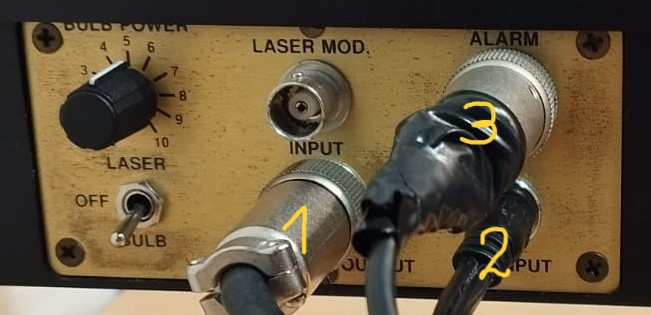

MÓDULO DE DETECCIÓN:
1. Va al DC OUTPUT del módulo fuente.
4. Va al multímetro para medir la señal enviada por el fotodiodo.
5. Va al cable fijo que sale del obturador.
6. Va al contador de frecuencia TTI / osciloscopio.
7. Va al osciloscopio.
8. Va al multímetro para monitorear el alto voltaje suministrado al tubo fotomultiplicador.

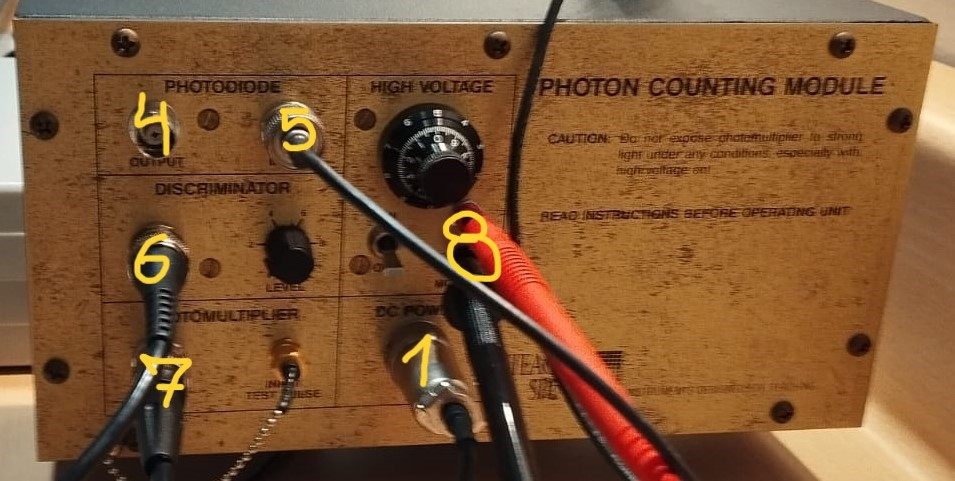

CONTADOR DE FRECUENCIA TTI:

6. Va al discriminador del módulo de detección.

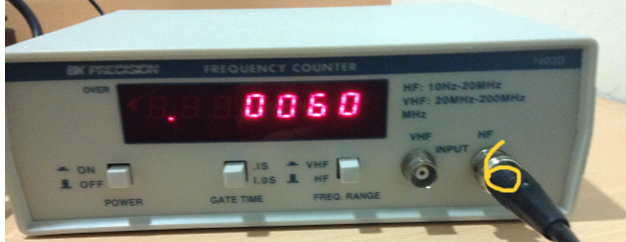

---
---

# SESIÓN 01

**FECHA:** 2024-08-29

**HORA:** 17:10

**EXPERIMENTALISTAS:** Juan Carlos Rojas Velásquez (jc.rojasv1@uniandes.edu.co) & Katherin A. Murcia S. (k.murcia@uniandes.edu.co)

**LABORATORIO:** B-103. Laboratorio de óptica.

**OBJETIVOS DE LA SESIÓN:** 
- Realizar la alineación del láser.
- Realizar la actividad 01: describir el patrón que se observa cuando la luz pasa por las dos rendijas, sólo por una y por ninguna.
- Realizar la actividad 02: 
    1. Registrar los voltajes en correspondientes al máximo y a un mínimo de intensidad cuando la luz pasa por dos rendijas y cuando sólo pasa por una. Justificar el factor en el que cambian los voltajes.
    2. Registrar el patrón de difracción para la doble rendija, la rendija derecha y la rendija izquierda. Graficar y discutir los resultados. Compararlos con lo esperado.
    3. Calcular la longitud de onda del láser a partir de los resultados de doble rendija.
    4. Argumentar cómo se evidencia la naturaleza ondulatoria de la luz en la actividad 02.

---

# ACTIVIDAD 01. EJERCICIO 01.

Describa el patrón que observa usando una tarjeta T cerca de la rendija detectora en los siguientes casos:

- La luz pasa por las dos rendijas: Se observan franjas verticales, cuya intensidad disminuye hacia los extremos del espectro.
- La luz pasa por una sola rendija: No se observa ningún patrón, tan sólo una mancha difusa de luz cuya intensidad disminuye hacia los extremos.
- La luz no pasa por ninguna rendija: No se observa nada.

Describa la transicion entre una y dos rendijas:
- La transición ocurre muy rápido, es casi imperceptible.

¿Que sucede con los máximos y mínimos de intensidad? 

- Cuando la luz pasa por las dos rendijas se observan múltiples máximos y mínimos de intensidad discretos, con la intensidad en conjunto siendo mayor hacia el centro del espectro observado.

- Cuando la luz pasa por una sola redija no se observa una distribución discreta de la intensidad, sino una continua, siendo mayor hacia el centro del espectro observado.

Explique con argumentos físicos lo que sucede. Compare el patrón de interferencia que usted ve con los que se predice teoricamente en los ejercicios 1 y 2.

- Cuando la luz pasa por las dos rendijas se observa un fenómeno ondulatorio de interferencia entre los dos frentes de onda. Cuando se presenta interferencia constructiva, se observan máximos de intensidad, y cuando se presenta interferencia destructiva se presentan mínimos de intensidad.

- Cuando la luz pasa por una sóla rendija se observa un fenómeno ondulatorio de difracción, que desvía el haz de luz en mayor medida hacia los extremos, generando una distribución continua de intensidad con un valor máximo en su centro, disminuyendo hacia ambos extremos.


---

# ACTIVIDAD 02. EJERCICIO 01.

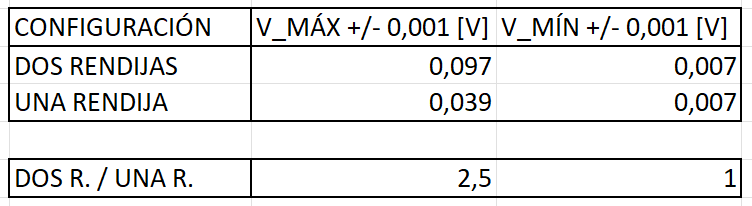

Puesto que $I \propto E_1^2 + E_2^2 + 2*(\vec{E_1} \cdot \vec{E_2})$, con $E_1^2$ y $E_2^2$ constantes, y $\vec E_1$ y $\vec E_2$ con la misma magnitud y dirección de polarización, el último término de la ecuación variará entre $-2$ y $2$, e $I \propto aE$, con $a$ entre $0$ y $4$. 

Con esto, es posible determinar que el valor que se tomó para $V_máx$ no correspondía al centro del máximo en cuestión.

Además, la intensidad de los mínimos para una y dos rendijas es la misma, $I=0$.

---

# ACTIVIDAD 2. EJERCICIO 2

Registre el patrón de interferencia para la doble rendija, la rendija derecha y la rednija izquierda. Grafique y discuta sus resultados. Compárelos con los esperados usando la teoría de Fresnel y Franhoffer.

In [550]:


#Para la parte de Fraunhofer
#D1 = 1.0
#D2 = 1.5
#lam = 675e-9  # Longitud de onda en metros
#x_range = np.linspace(-0.01, 0.005, 400)  # Rango de valores de x
#z = 1.0  # distancia fija


def Double_Slit(theta):
    a = 0.075
    d = 0.457
    lambda_ = 0.000695
    #l = 470
    I_0 = 0.08
    alpha = ((np.pi*a)/lambda_) * np.sin(theta)
    beta = ((np.pi*d)/lambda_ )* np.sin(theta)
    return (I_0) * (np.cos(beta))**2 * ((np.sin(alpha)/alpha)**2)

def Single_Slit(theta,I_0):
    a = 0.075
    #d = 0.457
    lambda_ = 0.000695
    #l = 470
    I_0 = 0.08
    alpha = ((np.pi*a)/lambda_) * np.sin(theta)
    return (I_0/4) *((np.sin(alpha)/alpha)**2)

In [551]:
def integrando_real_Feynman(y):
    term_1 = np.exp((np.pi * j * (y**2)) / (D1 * lambda_))
    term_2 = np.exp((np.pi * j * ((y - z)**2)) / (D2 * lambda_))
    return (term_1 * term_2).real

def integrando_imag_Feynman(y):
    term_1 = np.exp((np.pi * j * (y**2)) / (D1 * lambda_))
    term_2 = np.exp((np.pi * j * ((y - z)**2)) / (D2 * lambda_))
    return (term_1 * term_2).imag
    

In [552]:
a = 0.075e-3
d = 0.457e-3
D1 = 300e-3
D2 = 470e-3
lambda_ = 2*0.680e-6
j=1j
t_single = np.linspace(-0.007,0.007,100)

###########################################

inferior_left = -(d/2) - a/2
superior_left = -(d/2) + a/2


resultados_real_left = np.zeros_like(t_single)
errores_real_left = np.zeros_like(t_single)
resultados_imag_left = np.zeros_like(t_single)
errores_imag_left = np.zeros_like(t_single)

for i in range(len(t_single)):
    z=t_single[i]
    resultados_real_left[i], errores_real_left[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_left,superior_left,limit=1000)
    resultados_imag_left[i], errores_imag_left[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_left,superior_left,limit=1000)
    

resultados_left = (resultados_real_left**2 + resultados_imag_left**2)* 10**(7) *(1/5.5)

#####################################

inferior_right = d/2 - a/2
superior_right = d/2 + a/2

resultados_real_right = np.zeros_like(t_single)
errores_real_right = np.zeros_like(t_single)
resultados_imag_right = np.zeros_like(t_single)
errores_imag_right = np.zeros_like(t_single)

for i in range(len(t_single)):
    z=t_single[i]
    resultados_real_right[i], errores_real_right[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_right,superior_right,limit=1000)
    resultados_imag_right[i], errores_imag_right[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_right,superior_right,limit=1000)
    

resultados_right = (resultados_real_right**2 + resultados_imag_right**2)* 10**(7) *(1/2.45)

#######################################
t = np.linspace(-0.01,0.004,1000)

resultados_real_doble_1 = np.zeros_like(t)
errores_real_doble_1 = np.zeros_like(t)
resultados_imag_doble_1 = np.zeros_like(t)
errores_imag_doble_1 = np.zeros_like(t)
resultados_real_doble_2 = np.zeros_like(t)
errores_real_doble_2 = np.zeros_like(t)
resultados_imag_doble_2 = np.zeros_like(t)
errores_imag_doble_2 = np.zeros_like(t)


for i in range(len(t)):
    z=t[i]
    resultados_real_doble_1[i], errores_real_doble_1[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_left,superior_left,limit=1000)
    resultados_real_doble_2[i], errores_real_doble_2[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_right,superior_right,limit=1000)
    resultados_imag_doble_1[i], errores_imag_doble_1[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_left,superior_left,limit=1000)
    resultados_imag_doble_2[i], errores_imag_doble_2[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_right,superior_right,limit=1000)

resultados_doble = ((resultados_real_doble_1+resultados_real_doble_2)**2 + (resultados_imag_doble_1+resultados_imag_doble_2)**2)*10**(6)*4

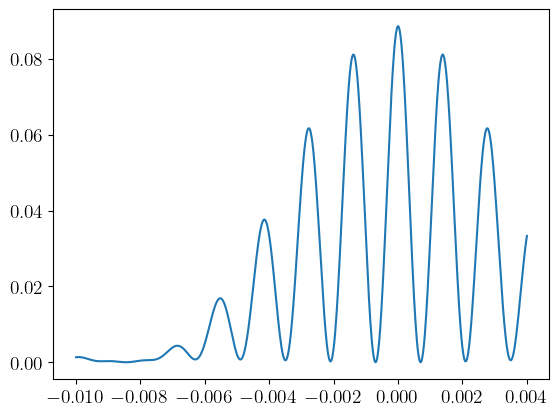

In [553]:
plt.plot(t,resultados_doble)

Los datos obtenido luego de hacer un barrido de 0 a 10 mm se muestran a continuación:

In [554]:
Data = pd.read_csv("TRABAJO EN CLASE_1.csv",sep=";")

In [555]:
Data

,POSICION,VOLTAJE,POSICION.1,VOLTAJE.1,POSICION.2,VOLTAJE.2
0,0.0,0.591,3.0,0.007,4.0,0.007
1,0.1,0.555,3.1,0.007,4.1,0.007
2,0.2,0.518,3.2,0.007,4.2,0.008
3,0.3,0.445,3.3,0.008,4.3,0.009
4,0.4,0.352,3.4,0.007,4.4,0.009
...,...,...,...,...,...,...
120,12.0,0.061,NaN,NaN,NaN,NaN
121,12.1,0.065,NaN,NaN,NaN,NaN
122,12.2,0.071,NaN,NaN,NaN,NaN
123,12.3,0.079,NaN,NaN,NaN,NaN


Para la doble rendija, entonces, se encontraron los siguientes datos (scatter plot) junto con el modelo teórico (línes continua).

In [556]:
x_pos_double_slit = (Data["POSICION"].values -8)*1e-3
V_double_slit = Data["VOLTAJE"].values -0.007

x_pos_single_slit_left = (Data["POSICION.1"].values-6)*1e-3
V_single_slit_left = Data["VOLTAJE.1"].values -0.007

x_pos_single_slit_right = (Data["POSICION.2"].values -7)*1e-3
V_single_slit_right = Data["VOLTAJE.2"].values -0.007

In [557]:
theta = np.arctan(x_pos_double_slit/470e-3)
theta_left = np.arctan(x_pos_single_slit_left/470e-3)
theta_right = np.arctan(x_pos_single_slit_right/470e-3)

d = 0.457e-3 #d en metros

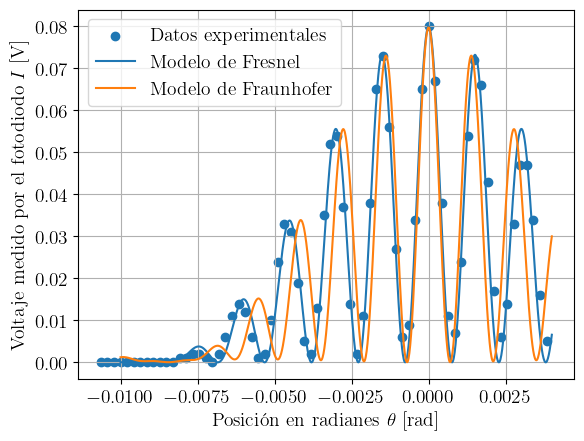

In [558]:
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"V [V]")

plt.scatter(theta[30:99],V_double_slit[30:99],label="Datos experimentales")

plt.plot(t,Double_Slit(t),label="Modelo de Fresnel")
plt.plot(t,0.9*resultados_doble,label="Modelo de Fraunhofer")
plt.grid()
plt.ylabel(r"Voltaje medido por el fotodiodo $I$ [V]")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.legend()
plt.savefig("Double.pdf")


In [559]:
4+18

22

Para la rendija derecha se encontraron los siguientes valores (scatter plot) y lo que predice la teoría (línea continua)

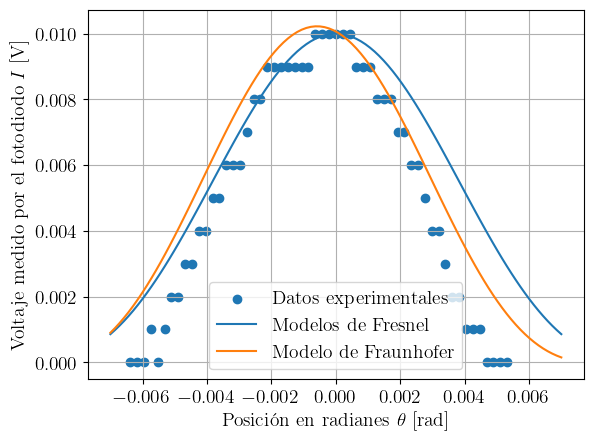

In [560]:
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$V$ [V]")

t_1 = np.linspace(-0.007,0.007,100)

plt.scatter(theta_left,V_single_slit_left,label="Datos experimentales")
plt.plot(t_1,(Single_Slit(t_1,0.08)/2),label="Modelos de Fresnel")
plt.plot(t_single,resultados_left,label="Modelo de Fraunhofer")
plt.grid()
plt.ylabel(r"Voltaje medido por el fotodiodo $I$ [V]")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.legend()
plt.savefig("Single_left.pdf")

In [561]:
x_pos_single_slit_left[55]

np.float64(0.0025)

Para la rendija izquierda se encontraron los siguientes valores (scatter plot) y lo que predice la teoría (línea continua)

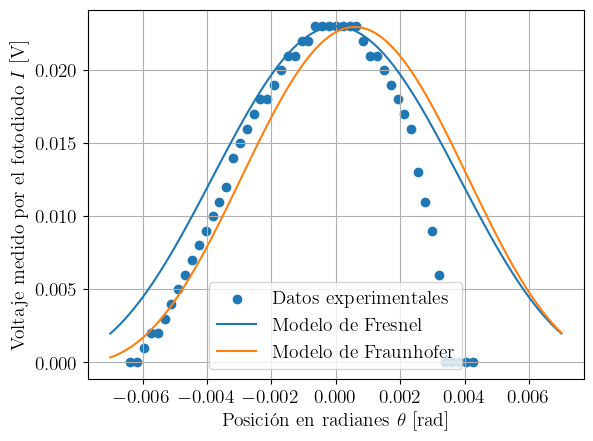

In [562]:
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$V$ [V]")

t_2 = np.linspace(-0.007,0.007,100)

plt.scatter(theta_right,V_single_slit_right,label="Datos experimentales")
plt.plot(t_2,(Single_Slit(t_2,0.08)*1.15),label="Modelo de Fresnel")
plt.plot(t_single,resultados_right,label="Modelo de Fraunhofer")
plt.grid()
plt.ylabel(r"Voltaje medido por el fotodiodo $I$ [V]")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.legend()
plt.savefig("Single_right.pdf")

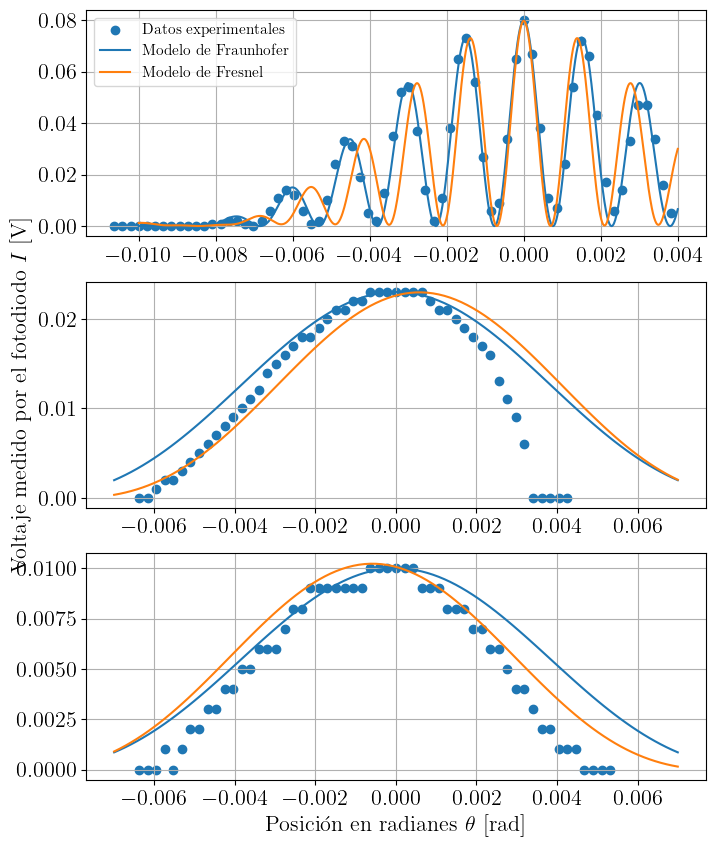

In [577]:
fig, ax = plt.subplots(3,1,gridspec_kw={'height_ratios': [4, 4, 4]},)
fig.set_size_inches(8,10)

ax[0].scatter(theta[30:99],V_double_slit[30:99],label="Datos experimentales")

ax[0].plot(t,Double_Slit(t),label="Modelo de Fraunhofer")
ax[0].plot(t,0.9*resultados_doble,label="Modelo de Fresnel")
ax[0].grid()
ax[0].legend(fontsize = 11,loc="upper left")





ax[1].scatter(theta_right,V_single_slit_right,label="Datos experimentales")
ax[1].plot(t_2,(Single_Slit(t_2,0.08)*1.15),label="Modelo de Fresnel")
ax[1].plot(t_single,resultados_right,label="Modelo de Fraunhofer")
ax[1].grid()
ax[1].set_ylabel(r"Voltaje medido por el fotodiodo $I$ [V]")

plt.scatter(theta_left,V_single_slit_left,label="Datos experimentales")
plt.plot(t_1,(Single_Slit(t_1,0.08)/2),label="Modelos de Fresnel")
plt.plot(t_single,resultados_left,label="Modelo de Fraunhofer")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.grid()
plt.savefig("laser.pdf")

Si bien el modelo se ajusta de ajusta de manera satisfactoria para los datos de doble rendija; este no se acomoda con los datos de una rendija simple.

# ACTIVIDAD 01. EJERCICIO 03.

Fórmula para la localización de la interferencia constructiva en doble rendija en el primer pico $$d \sin \theta = \lambda$$

In [564]:
n = np.where(theta == 0) # Índice donde el ángulo es cero. 
theta[n[0] + 7] # En este caso es 87
lambda_ = d*np.sin(theta[n[0] + 7]) # Hallar el valor de lambda dado por el primer pico dado por la fórmula mostrada anteriormente
lambda_  #Valor de la longitud de onda hallada mostrado a continuación:

V_double_slit[n[0]]

array([0.08])

In [565]:
0.005e-3*np.sqrt(2)

np.float64(7.071067811865476e-06)

In [69]:
L = np.ones_like(x_pos_double_slit)*0.47 #Array con valores de L
un_L = np.ones_like(L)*0.001 # Array con incertidumbres de L
un_x = np.ones_like(x_pos_double_slit)*0.005e-3 #Array con las incertidumbre de 
un_d = 0.001e-3 # Incertidumbre de la distancia entre las rendijas.
un_theta = (1/(L**2 + x_pos_double_slit**2))*np.sqrt(L**2 * un_x**2 + x_pos_double_slit**2 * un_L**2) 
"""Array de las incertidumbres de theta"""

'Array de las incertidumbres de theta'

In [70]:
un_theta[n[0]+7] #Incertidumbre de theta del punto seleccionado para utilizar la fórmula para los máximos

array([1.11002016e-05])

In [71]:
un_lambda = np.sqrt(np.sin(theta[n[0]+7])**2 *un_d**2 + d**2 * np.cos(theta[n[0]+7])**2 * un_theta[n[0]+7]**2 ) 
un_lambda #Incertidumbre de la longitud de onda del láser.

array([5.28690421e-09])

Por tanto la longitud de onda calculada es de 
$$(680 \pm 7) \ \text{nm}$$ este resultado es bastante similar al que reporta el fabricante, por lo que se puede decir que es exacto, alejándose del valor original en aproximadamente en 1.37$\sigma$.

# ACTIVIDAD 02. EJERCICIO 04.

El desarrollo de la actividad 02 permite evidenciar la naturaleza ondulatoria de la luz, pues es posible observar un patrón de interferencia al superponer dos frentes de onda, que no se ve con un sólo frente de onda, comportamiento propio de entidades de caracter ondulatorio.

---
---

# SESIÓN 02

**FECHA:** 2024-09-12

**HORA:** 17:00

**EXPERIMENTALISTAS:** Juan Carlos Rojas Velásquez (jc.rojasv1@uniandes.edu.co) & Katherin A. Murcia S. (k.murcia@uniandes.edu.co)

**LABORATORIO:** B-103. Laboratorio de óptica.

**OBJETIVOS DE LA SESIÓN:** 
- Realizar la actividad 03: 
    1. Registrar el patrón de difracción para la doble rendija y para una sola rendija, tomando 5 conteos por cada posición. Graficar y discutir los resultados. Compararlos con lo esperado. Calcular la longitud de onda de la luz. Realizar ajustes de acuerdo a la teoría de Fresnel y Fraunhoffer.
    2. Registrar los conteos para el máximo variando el alto voltaje en 350V y 650 V, registrando valores con el obturador abierto y cerrado. Analizar y discutir los resultados.
    3. Registrar 10 conteos por cada una de 10 diferentes intensidades del bombillo. Graficar la raíz del promedio en función de la desviación estándar e identificar el tipo de distribución que sigue el conteo de fotones.
    4. Explicar porqué se puede asegurar que la actividad 03 se realiza con un fotón a la vez.
    5. Explicar la evidencia que la actividad 03 da sobre el comportamiento corpuscular de la luz.

**NOTAS:** 
1. No pudimos empezar a tomar datos sino hasta después de las 17H, pues la alarma del instrumento estaba sonando sin razón. Parece que algo no está funcionando bien. El profesor revisó el instrumento y determinó que el problema es con la alarma y que se pueden tomar datos como estaba previsto. 
2. No pudimos empezar a tomar datos sino hasta después de las 18H, pues al intentar empezar a tomar datos no registrabamos conteos del orden de magnitud esperado. Nosotros, el monitor y el profesor revisamos el montaje y determinamos que quitar la primera rendija era lo mejor para el desarrollo del experimento.
3. Una vez logramos tomar datos, notamos que estos no estaban siguiendo el comportamiento esperado. El profesor nos recomendó volver a tomarlos, y sucedió lo mismo.
4. No encontramos la raiz del problema sino hasta después de las 19H: la rendija detectora se había caído del soporte.
5. Los datos que tomamos y el desarrollo del trabajo en clase se perdieron, pues la carpeta en la que estaban guardados se corrompió. Intentamos recuperarlos con la ayuda de varias personas pero no fue posible. El profesor puede corroborar que tomamos los datos, y dijo que nos enviaría unos datos simulados para poder desarrollar el informe. En consecuencia, no es posible desarrollar el trabajo en clase más allá de este punto.

**ALGUNAS COSAS QUE ALCANZAMOS A OBSERVAR CON LOS DATOS QUE TOMAMOS Y PERDIMOS:**
3. Ubíquese en el máximo de conteo de fotones y vaya cambiando el alto voltaje en tre 350V y 650V registrando los conteos con el obturador abierto y cerrado. ¿Qué tendencia observa?
    Notamos que si bien el conteo de fotones aumenta, el ruido (offset) también incrementa al incrementar el alto voltaje.
5.  ¿Por qué es posible asegurar que esta parte del experimento se hace con un fotón a la vez? Ayuda: El tubo fotomultiplicador tiene una eficiencia del 4% al convertir fotones verdes en pulsos. Puede calcular en promedio cada cuanto llega un foton al detector y compararlo con el tiempo de vuelo desde la fuente hasta el detector.
    Al tener en cuenta la eficiencia del fotomultiplicador junto con los conteos que medimos, notamos que pasa mucho tiempo entre conteo y conteo, por lo que es posible asegurar que el experimento se desarrolla con un sólo fotón a la vez.

In [609]:
datosBomb = pd.read_csv("Libro2.csv",sep=";")


In [610]:
Intensidades = datosBomb["Intensidad Bomb"].values
Intensidades

array([ 5,  6,  7,  8,  9, 10, 11])

In [611]:
datosBomb = datosBomb.drop("Intensidad Bomb",axis="columns")

In [612]:
Valores_conteo = [None,None,None,None,None,None,None] 
for i in range(len(Intensidades)): 
    Valores_conteo[i] = datosBomb.loc[i].values

In [613]:
Valores_conteo

[array([ 90, 109,  94, 104,  88,  94,  98,  97,  99, 101,  84,  90]),
 array([163, 164, 168, 153, 153, 155, 147, 159, 164, 149, 153, 150]),
 array([239, 227, 225, 237, 256, 231, 247, 247, 250, 245, 258, 231]),
 array([296, 309, 315, 300, 298, 290, 275, 305, 292, 313, 296, 300]),
 array([510, 499, 469, 469, 461, 479, 471, 492, 482, 446, 475, 493]),
 array([1102, 1029, 1042, 1069, 1187, 1101, 1039, 1037, 1060, 1112,  980,
        1019]),
 array([1531, 1537, 1497, 1543, 1505, 1473, 1572, 1533, 1560, 1547, 1601,
        1529])]

array([ 90, 109,  94, 104,  88,  94,  98,  97,  99, 101,  84,  90])

In [614]:
Promedio = [None,None,None,None,None,None,None]
Std = [None,None,None,None,None,None,None]

for i in range(len(Promedio)):
    Promedio[i] = np.mean(Valores_conteo[i])
    Std[i] = np.std(Valores_conteo[i])

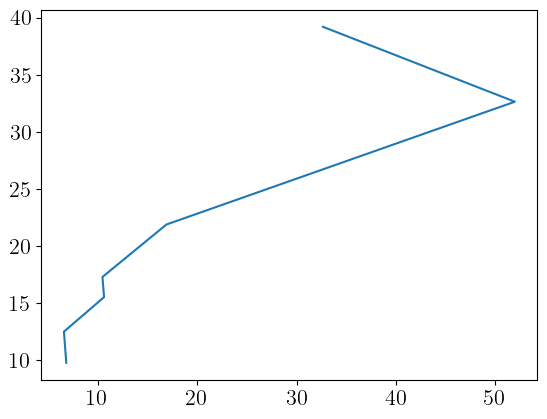

In [615]:
Promedio = np.array(Promedio)
Std = np.array(Std)
Std,np.sqrt(Promedio)
plt.plot(Std,np.sqrt(Promedio))

In [616]:


#Para la parte de Fraunhofer
#D1 = 1.0
#D2 = 1.5
#lam = 675e-9  # Longitud de onda en metros
#x_range = np.linspace(-0.01, 0.005, 400)  # Rango de valores de x
#z = 1.0  # distancia fija


def Double_Slit(theta):
    a = 0.1
    d = 0.406
    lambda_ = 330e-6
    #l = 470
    I_0 = 415-40
    alpha = ((np.pi*a)/lambda_) * np.sin(theta)
    beta = ((np.pi*d)/lambda_ )* np.sin(theta)
    return (I_0) * (np.cos(beta))**2 * ((np.sin(alpha)/alpha)**2)

def Single_Slit(theta,I_0):
    a = 0.075
    #d = 0.457
    lambda_ = 0.000340
    #l = 470
    I_0 = 415-40
    alpha = ((np.pi*a)/lambda_) * np.sin(theta)
    return (I_0/4) *((np.sin(alpha)/alpha)**2)

In [617]:
def integrando_real_Feynman(y):
    term_1 = np.exp((np.pi * j * (y**2)) / (D1 * lambda_))
    term_2 = np.exp((np.pi * j * ((y - z)**2)) / (D2 * lambda_))
    return (term_1 * term_2).real

def integrando_imag_Feynman(y):
    term_1 = np.exp((np.pi * j * (y**2)) / (D1 * lambda_))
    term_2 = np.exp((np.pi * j * ((y - z)**2)) / (D2 * lambda_))
    return (term_1 * term_2).imag
    

In [618]:
a = 0.1e-3
d = 0.406e-3
D1 = 300e-3
D2 = 470e-3
lambda_ = 2*0.330e-6
j=1j
t_single = np.linspace(-0.007,0.007,100)

###########################################

inferior_left = -(d/2) - a/2
superior_left = -(d/2) + a/2


resultados_real_left = np.zeros_like(t_single)
errores_real_left = np.zeros_like(t_single)
resultados_imag_left = np.zeros_like(t_single)
errores_imag_left = np.zeros_like(t_single)

for i in range(len(t_single)):
    z=t_single[i]
    resultados_real_left[i], errores_real_left[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_left,superior_left,limit=1000)
    resultados_imag_left[i], errores_imag_left[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_left,superior_left,limit=1000)
    

resultados_left = (resultados_real_left**2 + resultados_imag_left**2)* 10**(7) *(1/5.5)

#####################################

inferior_right = d/2 - a/2
superior_right = d/2 + a/2

resultados_real_right = np.zeros_like(t_single)
errores_real_right = np.zeros_like(t_single)
resultados_imag_right = np.zeros_like(t_single)
errores_imag_right = np.zeros_like(t_single)

for i in range(len(t_single)):
    z=t_single[i]
    resultados_real_right[i], errores_real_right[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_right,superior_right,limit=1000)
    resultados_imag_right[i], errores_imag_right[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_right,superior_right,limit=1000)
    

resultados_right = (resultados_real_right**2 + resultados_imag_right**2)* 10**(7) *(1/2.45)

#######################################
t = np.linspace(-0.01,0.004,1000)

resultados_real_doble_1 = np.zeros_like(t)
errores_real_doble_1 = np.zeros_like(t)
resultados_imag_doble_1 = np.zeros_like(t)
errores_imag_doble_1 = np.zeros_like(t)
resultados_real_doble_2 = np.zeros_like(t)
errores_real_doble_2 = np.zeros_like(t)
resultados_imag_doble_2 = np.zeros_like(t)
errores_imag_doble_2 = np.zeros_like(t)


for i in range(len(t)):
    z=t[i]
    resultados_real_doble_1[i], errores_real_doble_1[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_left,superior_left,limit=1000)
    resultados_real_doble_2[i], errores_real_doble_2[i] = integrate.quad(lambda y: integrando_real_Feynman(y),inferior_right,superior_right,limit=1000)
    resultados_imag_doble_1[i], errores_imag_doble_1[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_left,superior_left,limit=1000)
    resultados_imag_doble_2[i], errores_imag_doble_2[i] = integrate.quad(lambda y: integrando_imag_Feynman(y),inferior_right,superior_right,limit=1000)

resultados_doble = ((resultados_real_doble_1+resultados_real_doble_2)**2 + (resultados_imag_doble_1+resultados_imag_doble_2)**2)*10**(6)*4

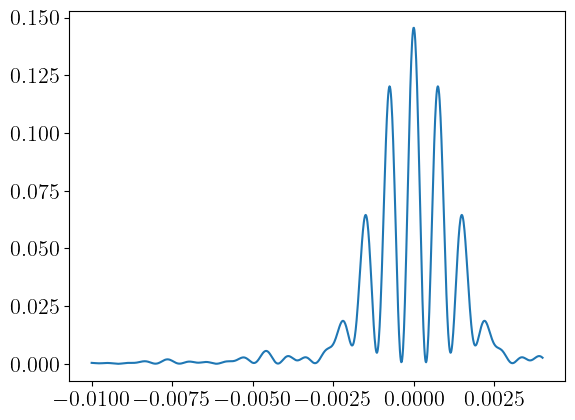

In [619]:
plt.plot(t,resultados_doble)

Los datos obtenido luego de hacer un barrido de 0 a 10 mm se muestran a continuación:

In [620]:
Data = pd.read_csv("Libro1.csv",sep=";")

In [621]:
Data

,Posicion,Conteos,Posicion.1,Conteos.1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0.0,39,0.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,44,1.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.5,60,1.1,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.6,71,1.2,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.7,102,1.3,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,6.0,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,6.1,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,6.2,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,6.3,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para la doble rendija, entonces, se encontraron los siguientes datos (scatter plot) junto con el modelo teórico (línes continua).

In [656]:
theta_one = np.arctan(x_pos_double_slit_one_photon/470e-3)


d = 0.457e-3 #d en metros

In [659]:
np.where(V_double_slit_one_photon == max(V_double_slit_one_photon))
x_0 = x_pos_double_slit_one_photon[np.where(V_double_slit_one_photon == max(V_double_slit_one_photon))]
x_0

x_pos_double_slit_one_photon = (Data["Posicion"].values)*1e-3 - x_0
V_double_slit_one_photon = Data["Conteos"].values -40

x_pos_single_slit_one_photon = (Data["Posicion.1"].values)*1e-3
V_single_slit_one_photon = Data["Conteos.1"].values


(array([40]),)

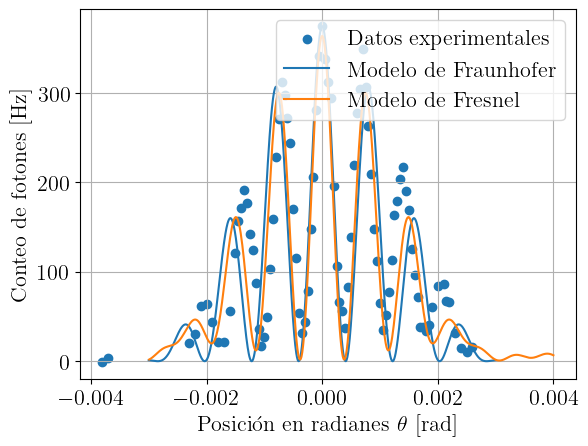

In [660]:
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"V [V]")
t = np.linspace(-0.003,0.003,1000)
plt.scatter(x_pos_double_slit_one_photon,V_double_slit_one_photon,label="Datos experimentales")

t1 = np.linspace(-0.01,0.004,1000)
plt.plot(t,Double_Slit(t),label="Modelo de Fraunhofer")
plt.plot(t1[500:],2.5e3*resultados_doble[500:],label="Modelo de Fresnel")
plt.grid()
plt.ylabel(r"Conteo de fotones [Hz]")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.legend()
plt.savefig("Double_one_photon.pdf")
np.where(V_double_slit_one_photon == max(V_double_slit_one_photon))

In [389]:
4+18

22

Para la rendija derecha se encontraron los siguientes valores (scatter plot) y lo que predice la teoría (línea continua)

87 87


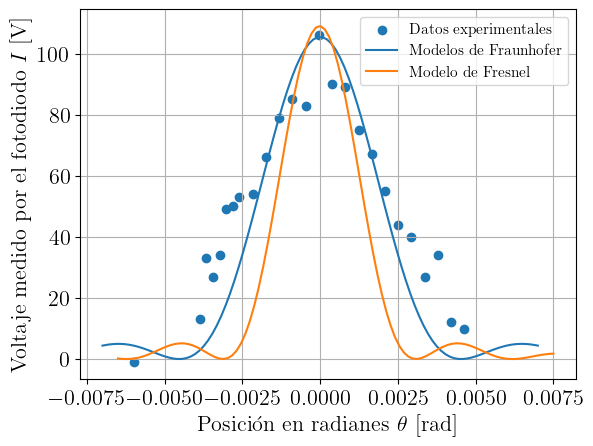

In [643]:
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.ylabel(r" Conteo de fotones [Hz]")

x_pos_single_slit_one_photon= (Data["Posicion.1"].values)*1e-3 - x1
V_single_slit_one_photon = Data["Conteos.1"].values

print(len(x_pos_double_slit_one_photon),len(V_single_slit_one_photon))

theta_single_one = np.arctan(x_pos_single_slit_one_photon/470e-3)-0.006
t_1 = np.linspace(-0.007,0.007,100)

plt.scatter(theta_single_one,V_single_slit_one_photon-40,label="Datos experimentales")
plt.plot(t_1,(45/40)*Single_Slit(t_1,0.08),label="Modelos de Fraunhofer")
plt.plot(t_single+0.0005,6e3*resultados_left,label="Modelo de Fresnel")
plt.grid()
plt.ylabel(r"Voltaje medido por el fotodiodo $I$ [V]")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.legend(loc="upper right",fontsize=11)
plt.savefig("Single_left_one_photon.pdf")

In [631]:
x1 = x_pos_single_slit_one_photon[np.where(V_single_slit_one_photon == max(V_single_slit_one_photon))]

Para la rendija izquierda se encontraron los siguientes valores (scatter plot) y lo que predice la teoría (línea continua)

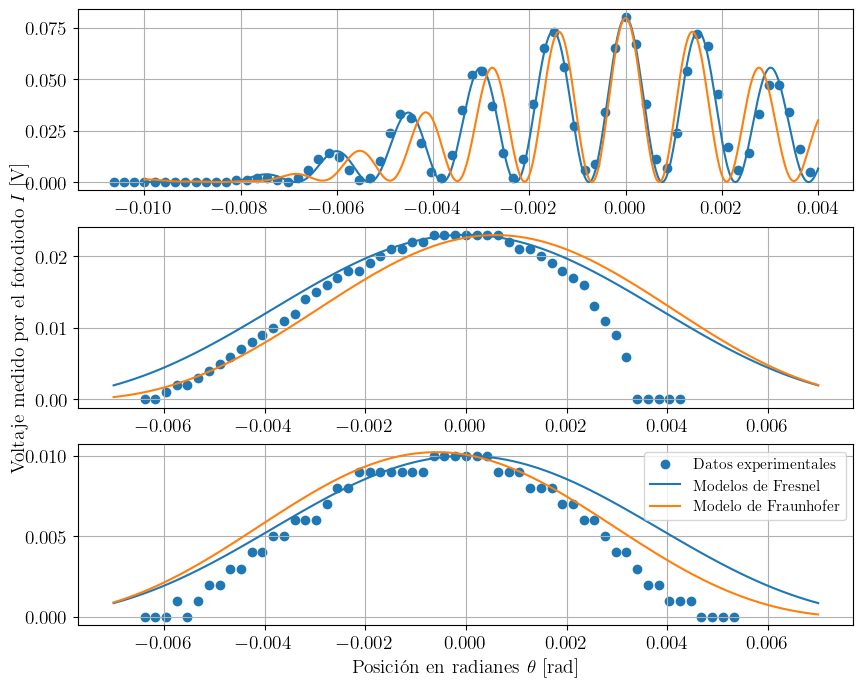

In [200]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(10,8)

ax[0].scatter(theta[30:99],V_double_slit[30:99],label="Datos experimentales")

ax[0].plot(t,Double_Slit(t),label="Modelo de Fresnel")
ax[0].plot(t,0.9*resultados_doble,label="Modelo de Fraunhofer")
ax[0].grid()




ax[1].scatter(theta_right,V_single_slit_right,label="Datos experimentales")
ax[1].plot(t_2,(Single_Slit(t_2,0.08)*1.15),label="Modelo de Fresnel")
ax[1].plot(t_single,resultados_right,label="Modelo de Fraunhofer")
ax[1].grid()
ax[1].set_ylabel(r"Voltaje medido por el fotodiodo $I$ [V]")

plt.scatter(theta_left,V_single_slit_left,label="Datos experimentales")
plt.plot(t_1,(Single_Slit(t_1,0.08)/2),label="Modelos de Fresnel")
plt.plot(t_single,resultados_left,label="Modelo de Fraunhofer")
plt.xlabel(r"Posición en radianes $\theta$ [rad]")
plt.grid()
plt.legend(fontsize = 11,loc="upper right")
plt.savefig("laser.pdf")

Si bien el modelo se ajusta de ajusta de manera satisfactoria para los datos de doble rendija; este no se acomoda con los datos de una rendija simple.

# ACTIVIDAD 01. EJERCICIO 03.

Fórmula para la localización de la interferencia constructiva en doble rendija en el primer pico $$d \sin \theta = \lambda$$

In [681]:
n = np.where(theta == 0) # Índice donde el ángulo es cero. 
theta[n[0] + 7] # En este caso es 87
lambda_ = d*np.sin(x_pos_double_slit_one_photon[54]) # Hallar el valor de lambda dado por el primer pico dado por la fórmula mostrada anteriormente
lambda_  #Valor de la longitud de onda hallada mostrado a continuación:


np.float64(3.198999738748342e-07)

In [673]:
L = np.ones_like(x_pos_double_slit_one_photon)*0.47 #Array con valores de L
un_L = np.ones_like(L)*0.001 # Array con incertidumbres de L
un_x = np.ones_like(x_pos_double_slit_one_photon)*0.005e-3 #Array con las incertidumbre de 
un_d = 0.001e-3 # Incertidumbre de la distancia entre las rendijas.
un_theta = (1/(L**2 + x_pos_double_slit_one_photon**2))*np.sqrt(L**2 * un_x**2 + x_pos_double_slit_one_photon**2 * un_L**2) 
"""Array de las incertidumbres de theta"""

'Array de las incertidumbres de theta'

In [675]:
un_theta[54] #Incertidumbre de theta del punto seleccionado para utilizar la fórmula para los máximos

np.float64(1.1100201575142934e-05)

In [678]:
un_lambda = np.sqrt(np.sin(theta_one[54])**2 *un_d**2 + d**2 * np.cos(theta_one[54])**2 * un_theta[54]**2 ) 
un_lambda #Incertidumbre de la longitud de onda del láser.

np.float64(5.286904214115145e-09)

In [667]:
np.where(V_double_slit_one_photon == 349)

(array([54]),)

In [668]:
theta_one[54]

np.float64(0.001489360600895938)